<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 05-1 de Data Science





# Scaling & Cross Validation

Tempo estimado: **60** minutos

## Objetivos


Após completar este aula, você será capaz de:

* Compreender a importancia do `Scaling`
* Aplicar diferentes técnicas de `Scaling`
* Compreender a importancia do `Cross Validation`
* Aplicar diferentes técnicas de `Cross Validation`

## Bibliotecas

In [241]:
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import matplotlib

import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.model_selection import LeaveOneOut 

# usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

## Obtendo Dados

In [242]:
caminho = 'https://raw.githubusercontent.com/EduPekUfpr/PPGOLD7037/main/Data/diabetes.tsv'
#Ler o Data Set original
df_diabetes = pd.read_csv(caminho, sep = "\t") # load the dataset as a pandas data frame
df_diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [243]:
df_diabetes.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## Pré Processamento

[Text(0.5, 0, 'AGE'),
 Text(1.5, 0, 'SEX'),
 Text(2.5, 0, 'BMI'),
 Text(3.5, 0, 'BP'),
 Text(4.5, 0, 'S1'),
 Text(5.5, 0, 'S2'),
 Text(6.5, 0, 'S3'),
 Text(7.5, 0, 'S4'),
 Text(8.5, 0, 'S5'),
 Text(9.5, 0, 'S6'),
 Text(10.5, 0, 'Y')]

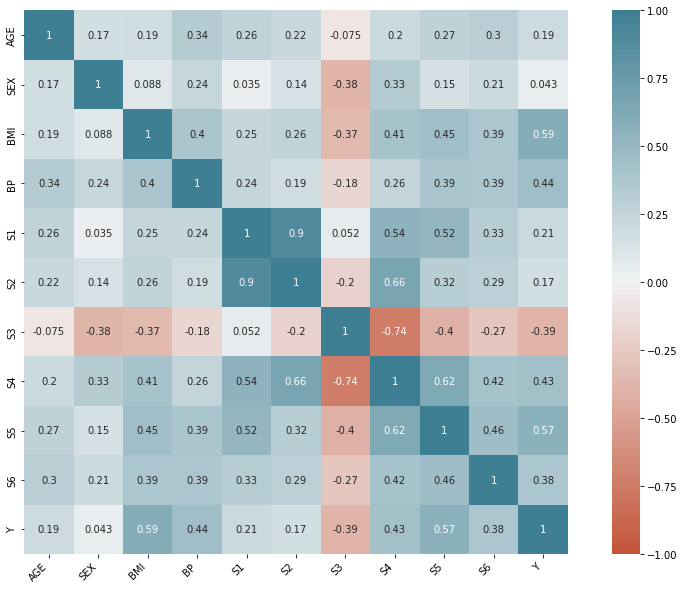

In [244]:
r = df_diabetes.corr()
# Criando uma área para plotagem do gráfico
fig = plt.figure(figsize=(16,10))
ax = sns.heatmap(
                    r 
                    ,vmin=-1
                    , vmax=1
                    , center=0
                    ,cmap=sns.diverging_palette(20, 220, n=200)
                    ,square=True
                    ,annot=True
                    ,fmt='.2g'
                )

ax.set_xticklabels(
                    ax.get_xticklabels()
                    ,rotation=45
                    ,horizontalalignment='right'
                    )

In [245]:
#Separar as variáveis dependentes e independentes
independentVariables = df_diabetes.drop('Y', axis = 1)
dependentVariable = df_diabetes[["Y"]]

## Scaling

* O scaling é um conjunto de técnicas que visam padronizar ou normalizar os dados, para que eles estejam na mesma escala e/ou distribuição,
* O objetivo principal do scaling é ajustar a escala das variáveis para que elas tenham impacto semelhante em um modelo de aprendizado de máquina, independentemente da unidade de medida ou da escala original das variáveis

### Min-Max Scaler 

* O Resultado será uma variável que varia entre 0 e 1, onde 0 representa o menor valor na variável original e 1 representa o maior valor

$$x_{scaled} = \frac{(x – x_{min})}{(x_{max} – x_{min})}$$

* onde:
    * $x$ é o valor original da variável;
    * $x_{min}$ é o menor valor na variável original;
    * $x_{max}$ é o maior valor na variável original;
    * $x_{scaled}$ é o valor transformado da variável na escala ajustada, que varia entre 0 e 1.

In [246]:
# define min max scaler
scaler_min_max = MinMaxScaler()
# transform data
scaled_min_max = pd.DataFrame(scaler_min_max.fit_transform(independentVariables), columns = independentVariables.columns)
scaled_min_max.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333


In [247]:
scaled_min_max.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.491968,0.468326,0.346107,0.459817,0.451668,0.367725,0.360889,0.291996,0.485560,0.503942
std,0.218484,0.499561,0.182567,0.194807,0.169647,0.151460,0.167977,0.182010,0.183366,0.174187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320833,0.000000,0.214876,0.309859,0.329657,0.271165,0.237013,0.141044,0.357542,0.382576
50%,0.516667,0.000000,0.318182,0.436620,0.436275,0.355578,0.337662,0.282087,0.478062,0.500000
75%,0.666667,1.000000,0.465909,0.605634,0.552696,0.462649,0.464286,0.423131,0.610446,0.606061
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[Text(0.5, 0, 'AGE'),
 Text(1.5, 0, 'SEX'),
 Text(2.5, 0, 'BMI'),
 Text(3.5, 0, 'BP'),
 Text(4.5, 0, 'S1'),
 Text(5.5, 0, 'S2'),
 Text(6.5, 0, 'S3'),
 Text(7.5, 0, 'S4'),
 Text(8.5, 0, 'S5'),
 Text(9.5, 0, 'S6')]

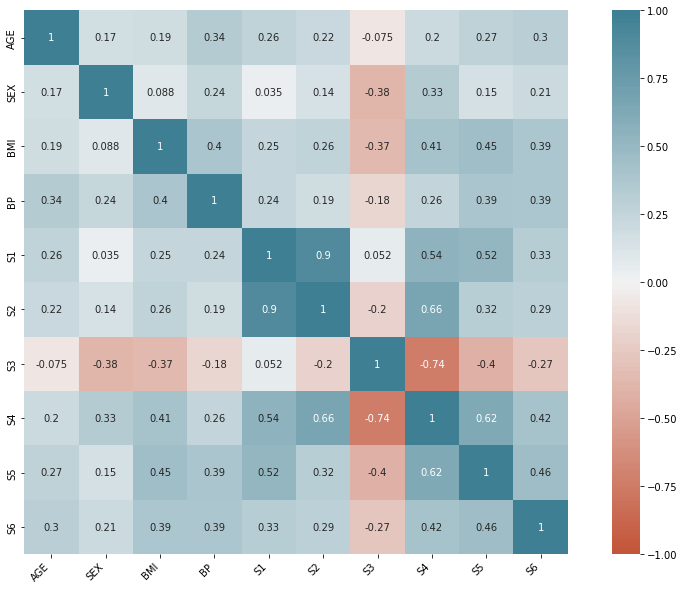

In [248]:
r_min_max = scaled_min_max.corr()
# Criando uma área para plotagem do gráfico
fig = plt.figure(figsize=(16,10))
ax = sns.heatmap(
                    r_min_max
                    ,vmin=-1
                    , vmax=1
                    , center=0
                    ,cmap=sns.diverging_palette(20, 220, n=200)
                    ,square=True
                    ,annot=True
                    ,fmt='.2g'
                )

ax.set_xticklabels(
                    ax.get_xticklabels()
                    ,rotation=45
                    ,horizontalalignment='right'
                    )

### Standard Scaler

$$
\begin{equation}
z = \frac{x - \mu}{\sigma}
\end{equation}
$$
* Onde:

    * $x$ é o valor original da variável \\
    * $\mu$ é a média da variável em todo o conjunto de dados  \\
    * $\sigma$ é o desvio padrão da variável em todo o conjunto de dados \\
    * $z$ é o valor padronizado da variável \\

* Essa fórmula representa a transformação de um valor original $x$ em um valor padronizado $z$ com média zero e desvio padrão igual a um. O StandardScaler aplica essa transformação a todas as variáveis do conjunto de dados, de forma a torná-las comparáveis e facilitar a análise estatística.

In [249]:
# define standard scaler
scaler_standard = StandardScaler()
# transform data
scaled_standard = pd.DataFrame(scaler_standard.fit_transform(independentVariables), columns = independentVariables.columns)
scaled_standard.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [250]:
scaled_standard.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,8.037814e-18,1.607563e-16,1.004727e-16,1.060991e-15,-2.893613e-16,-1.245861e-16,-1.326239e-16,-1.446806e-16,2.250588e-16,2.371155e-16
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363050e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651040e+00,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706500e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-6.989486e-01,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192138e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-4.093693e-02,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493678e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,6.818506e-01,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776058e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808722e+00,2.851075e+00


[Text(0.5, 0, 'AGE'),
 Text(1.5, 0, 'SEX'),
 Text(2.5, 0, 'BMI'),
 Text(3.5, 0, 'BP'),
 Text(4.5, 0, 'S1'),
 Text(5.5, 0, 'S2'),
 Text(6.5, 0, 'S3'),
 Text(7.5, 0, 'S4'),
 Text(8.5, 0, 'S5'),
 Text(9.5, 0, 'S6')]

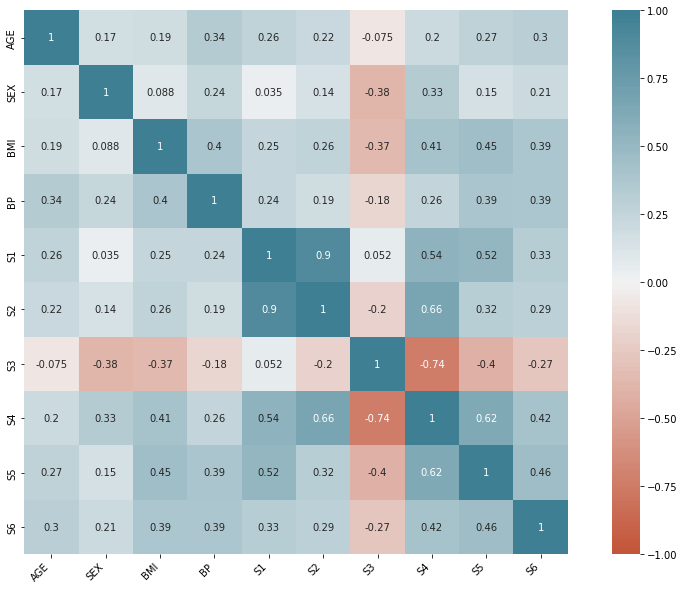

In [251]:
r_standard = scaled_standard.corr()
# Criando uma área para plotagem do gráfico
fig = plt.figure(figsize=(16,10))
ax = sns.heatmap(
                    r_standard 
                    ,vmin=-1
                    , vmax=1
                    , center=0
                    ,cmap=sns.diverging_palette(20, 220, n=200)
                    ,square=True
                    ,annot=True
                    ,fmt='.2g'
                )

ax.set_xticklabels(
                    ax.get_xticklabels()
                    ,rotation=45
                    ,horizontalalignment='right'
                    )

### Robust Scaler


$$\begin{equation}
z_i = \frac{x_i - \text{mediana}(X)}{\text{IQR}(X)}
\end{equation}$$

* onde:

    * $x_i$ é o valor original da i-ésima variável
    * $\text{mediana}(X)$ é a mediana de todas as observações do conjunto de dados
    * $\text{IQR}(X)$ é o intervalo interquartil de todas as observações do conjunto de dados
    * $z_i$ é o valor padronizado da i-ésima variável

In [252]:
scaler_robust = RobustScaler()

scaled_robust = pd.DataFrame(scaler_robust.fit_transform(independentVariables), columns = independentVariables.columns)

scaled_robust.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.433735,1.0,1.053498,0.380952,-0.637363,-0.514954,-0.571429,0.0,0.332755,-0.271186
1,-0.096386,0.0,-0.674897,-0.285714,-0.065934,-0.254876,1.257143,-0.5,-1.010756,-1.491525
2,1.060241,1.0,0.790123,0.000000,-0.659341,-0.504551,-0.400000,0.0,0.073213,-0.406780
3,-1.253012,0.0,-0.065844,-0.428571,0.263736,0.478544,-0.457143,0.5,0.375087,-0.135593
4,0.000000,0.0,-0.444444,0.380952,0.131868,0.322497,0.228571,0.0,-0.457391,-0.745763


In [253]:
scaled_robust.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,-0.071417,0.468326,0.111241,0.078429,0.069017,0.063437,0.102198,0.035124,0.029647,0.017639
std,0.631760,0.499561,0.727263,0.658633,0.760617,0.790977,0.739097,0.645225,0.725039,0.779413
min,-1.493976,0.000000,-1.267490,-1.476190,-1.956044,-1.856957,-1.485714,-1.000000,-1.890285,-2.237288
25%,-0.566265,0.000000,-0.411523,-0.428571,-0.478022,-0.440832,-0.442857,-0.500000,-0.476544,-0.525424
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.433735,1.000000,0.588477,0.571429,0.521978,0.559168,0.557143,0.500000,0.523456,0.474576
max,1.397590,1.000000,2.716049,1.904762,2.527473,3.365410,2.914286,2.545000,2.063775,2.237288


[Text(0.5, 0, 'AGE'),
 Text(1.5, 0, 'SEX'),
 Text(2.5, 0, 'BMI'),
 Text(3.5, 0, 'BP'),
 Text(4.5, 0, 'S1'),
 Text(5.5, 0, 'S2'),
 Text(6.5, 0, 'S3'),
 Text(7.5, 0, 'S4'),
 Text(8.5, 0, 'S5'),
 Text(9.5, 0, 'S6')]

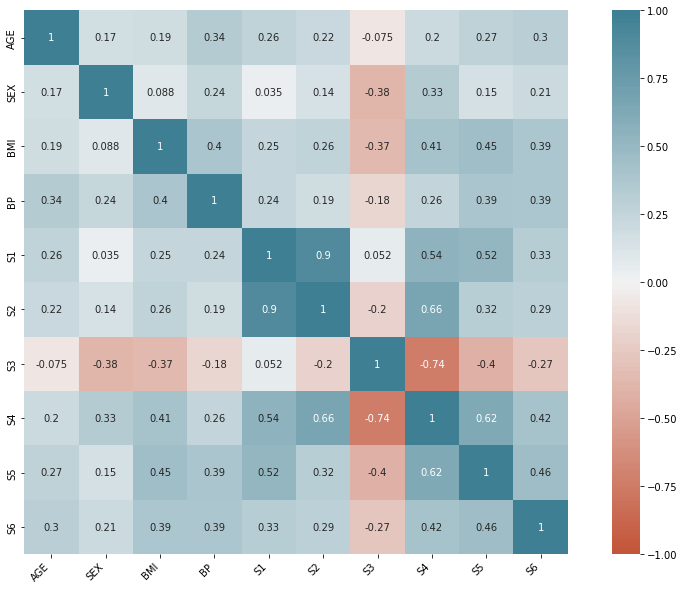

In [254]:
r_robust = scaled_robust.corr()
# Criando uma área para plotagem do gráfico
fig = plt.figure(figsize=(16,10))
ax = sns.heatmap(
                    r_robust 
                    ,vmin=-1
                    , vmax=1
                    , center=0
                    ,cmap=sns.diverging_palette(20, 220, n=200)
                    ,square=True
                    ,annot=True
                    ,fmt='.2g'
                )

ax.set_xticklabels(
                    ax.get_xticklabels()
                    ,rotation=45
                    ,horizontalalignment='right'
                    )

## Scaling Dataset Frutas
*Retirado da referência [5]*

In [255]:
index_list = ['Orange','Apple','Banana','Grape','Jackfruit']
columns_list =['WEIGHT','PRICE']

df_fruits = pd.DataFrame(
                        {
                            'WEIGHT': [15, 18, 12,10,50]
                            ,'PRICE': [1,3,2,5,20]
                        }
                            ,index = index_list)
df_fruits.head()


,WEIGHT,PRICE
Orange,15,1
Apple,18,3
Banana,12,2
Grape,10,5
Jackfruit,50,20


**Standart Scaler**

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


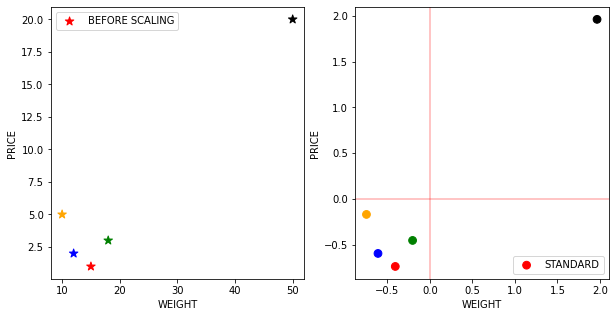

In [256]:

df_fruits_scaled_standart = pd.DataFrame(scaler_standard.fit_transform(df_fruits),columns=columns_list,index = index_list)

fig,ax = plt.subplots(1,2,figsize=(10,5))

df_fruits.plot.scatter(
                          x='WEIGHT'
                        , y='PRICE'
                        , color=['red','green','blue','orange','black']
                        , marker = '*'
                        , s=80
                        , label='BEFORE SCALING'
                        , ax = ax[0])

df_fruits_scaled_standart.plot.scatter(
                                          x='WEIGHT'
                                        , y='PRICE'
                                        , color=['red','green','blue','orange','black']
                                        , marker = 'o'
                                        , s=60
                                        , label='STANDARD'
                                        , ax = ax[1])
plt.axhline(0, color='red',alpha=0.3)
plt.axvline(0, color='red',alpha=0.3)                                        


**Robust scaler**

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


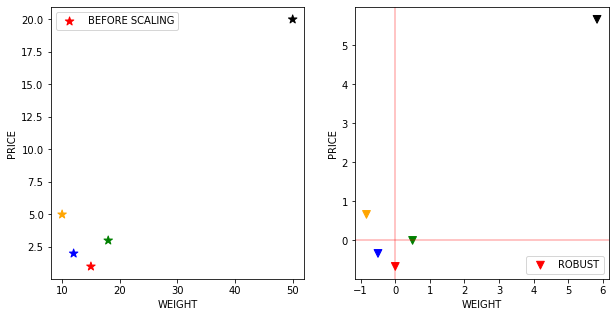

In [257]:
df_fruits_scaled_robust = pd.DataFrame(scaler_robust.fit_transform(df_fruits),columns=columns_list,index = index_list)

fig,ax = plt.subplots(1,2,figsize=(10,5))

df_fruits.plot.scatter(
                          x='WEIGHT'
                        , y='PRICE'
                        , color=['red','green','blue','orange','black']
                        , marker = '*'
                        , s=80
                        , label='BEFORE SCALING'
                        , ax = ax[0])

df_fruits_scaled_robust.plot.scatter(
                                        x='WEIGHT'
                                        , y='PRICE'
                                        , color=['red','green','blue','orange','black']
                                        , marker = 'v'
                                        , s=60
                                        , label='ROBUST'
                                        , ax = ax[1])
plt.axhline(0, color='red',alpha=0.3)
plt.axvline(0, color='red',alpha=0.3)                                        


**Min max scaling**

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


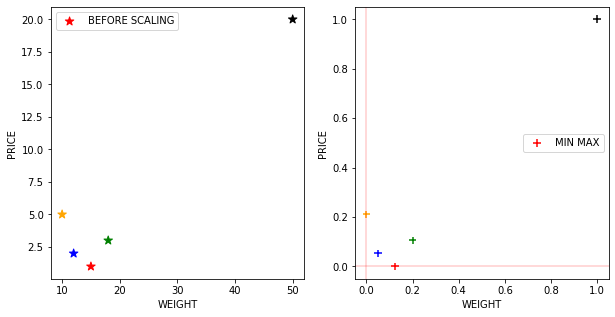

In [258]:
df_fruits_scaled_min_max = pd.DataFrame(scaler_min_max.fit_transform(df_fruits),columns=columns_list, index = index_list)

fig,ax = plt.subplots(1,2,figsize=(10,5))

df_fruits.plot.scatter(
                          x='WEIGHT'
                        , y='PRICE'
                        , color=['red','green','blue','orange','black']
                        , marker = '*'
                        , s=80
                        , label='BEFORE SCALING'
                        , ax = ax[0])

df_fruits_scaled_min_max.plot.scatter(
                                        x='WEIGHT'
                                        , y='PRICE'
                                        , color=['red','green','blue','orange','black']
                                        , marker = '+'
                                        , s=60
                                        , label='MIN MAX'
                                        , ax = ax[1])
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

**Consolidado**

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


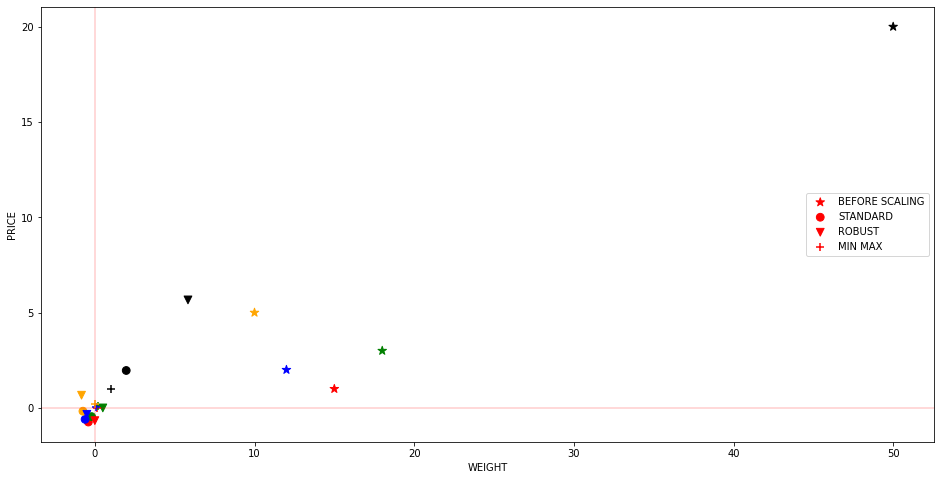

In [259]:
fig,ax = plt.subplots(1,1,figsize=(16,8))

df_fruits.plot.scatter(
                          x='WEIGHT'
                        , y='PRICE'
                        , color=['red','green','blue','orange','black']
                        , marker = '*'
                        , s=80
                        , label='BEFORE SCALING'
                        , ax = ax)
                        
df_fruits_scaled_standart.plot.scatter(
                                          x='WEIGHT'
                                        , y='PRICE'
                                        , color=['red','green','blue','orange','black']
                                        , marker = 'o'
                                        , s=60
                                        , label='STANDARD'
                                        , ax = ax)
df_fruits_scaled_robust.plot.scatter(
                                        x='WEIGHT'
                                        , y='PRICE'
                                        , color=['red','green','blue','orange','black']
                                        , marker = 'v'
                                        , s=60
                                        , label='ROBUST'
                                        , ax = ax)    
df_fruits_scaled_min_max.plot.scatter(
                                        x='WEIGHT'
                                        , y='PRICE'
                                        , color=['red','green','blue','orange','black']
                                        , marker = '+'
                                        , s=60
                                        , label='MIN MAX'
                                        , ax = ax)    
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)                                                                            

## Cross Validation

### Random Split

In [260]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(independentVariables, dependentVariable, test_size=0.20, random_state = 10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353, 1)
(89, 10) (89, 1)


In [261]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

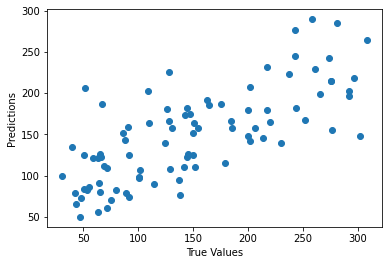

In [262]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [263]:
R2 = model.score(X_test, y_test)
print("Score:", R2)

Score: 0.5341988244945841


Text(-50, 0.0025, 'SCORE: 0.534')

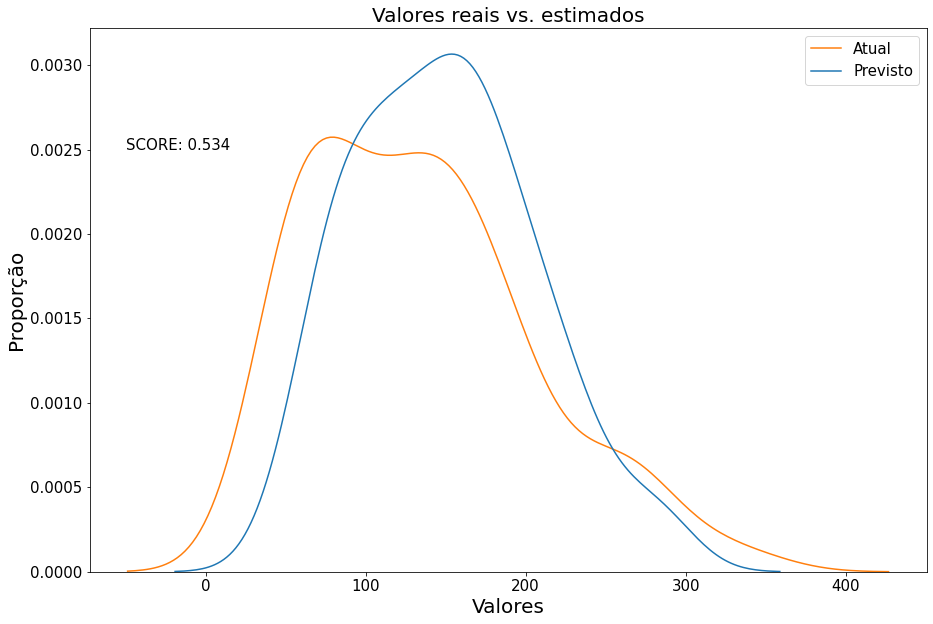

In [264]:
indexe_random_split = np.arange(start=0,stop=predictions.shape[0])
df_random_split = pd.DataFrame(predictions,index=indexe_random_split)
df_random_split.columns = ['Predicted']
df_random_split['True'] = dependentVariable['Y']

# Criando a área do gráfico
plt.figure(figsize=(15, 10))

# Criando um gráfico de densidade
sns.kdeplot(data = df_random_split[['Predicted','True']]) 

# Adicionando títulos
plt.title('Valores reais vs. estimados', size = 20)

# Adicionando o nome do eixo x
plt.xlabel('Valores', size = 20)

# Adicionando o nome do eixo y
plt.ylabel('Proporção', size = 20)
# Configurando tamanho do eixo y
plt.yticks(size = 15)

# Configurando tamanho do eixo x
plt.xticks(size = 15) 

# Adicionando legendas
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

# Criando um objeto para guardadr o Score(R2)
tt = "SCORE: %.3f" % R2

# Passando o objeto de texto na posição desejada
plt.text(-50, 0.0025, tt, size = 15)

### K-Folds Cross Validation

In [265]:
splits = 16
scores = cross_val_score(model, independentVariables, dependentVariable, cv=splits)
print("Cross-validated scores:", scores)


Cross-validated scores: [0.37965944 0.56186282 0.18617883 0.2004953  0.54115534 0.51287441
 0.45935366 0.26887083 0.63870656 0.57796879 0.4067893  0.19849271
 0.53542514 0.17376837 0.76900598 0.6163576 ]


Text(0, 0.5, 'Predictions')

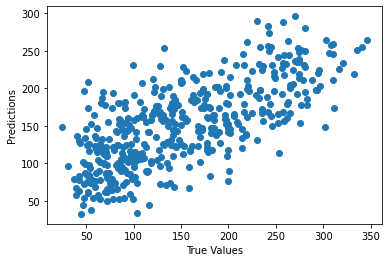

In [266]:
# Make cross validated predictions
predictions = cross_val_predict(model, independentVariables, dependentVariable, cv=splits)
plt.scatter(dependentVariable, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [267]:
accuracy = metrics.r2_score(dependentVariable, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.4936050151115662


Text(-50, 0.0025, 'Acuracy: 0.494')

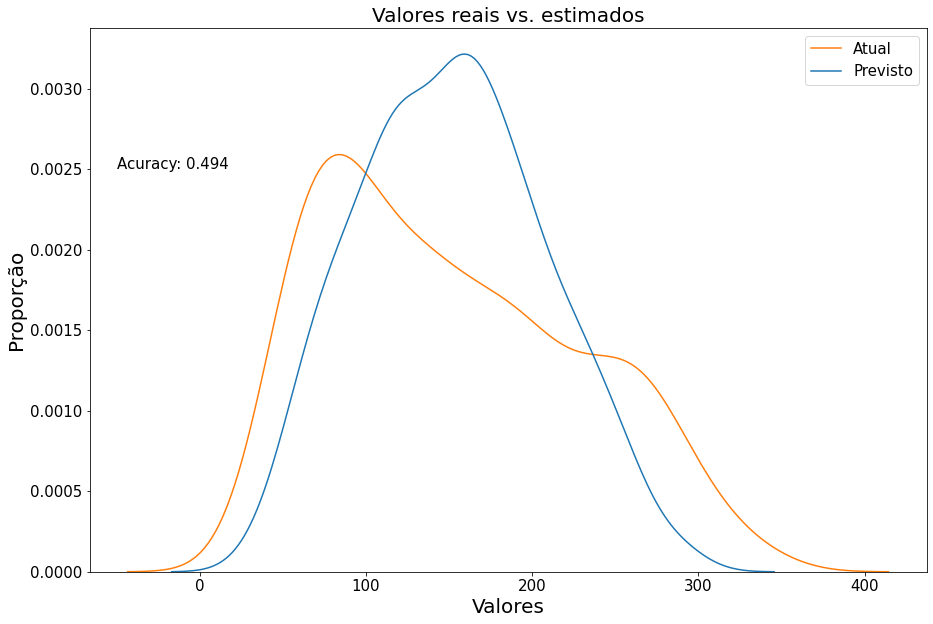

In [268]:
indexe_kfold_split = np.arange(start=0,stop=predictions.shape[0])
df_kfold_split = pd.DataFrame(predictions,index=indexe_kfold_split)
df_kfold_split.columns = ['Predicted']
df_kfold_split['True'] = dependentVariable['Y']

# Criando a área do gráfico
plt.figure(figsize=(15, 10))

# Criando um gráfico de densidade
sns.kdeplot(data = df_kfold_split[['Predicted','True']]) 

# Adicionando títulos
plt.title('Valores reais vs. estimados', size = 20)

# Adicionando o nome do eixo x
plt.xlabel('Valores', size = 20)

# Adicionando o nome do eixo y
plt.ylabel('Proporção', size = 20)
# Configurando tamanho do eixo y
plt.yticks(size = 15)

# Configurando tamanho do eixo x
plt.xticks(size = 15) 

# Adicionando legendas
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

# Criando um objeto para guardadr o Score(R2)
tt = "Acuracy: %.3f" % accuracy

# Passando o objeto de texto na posição desejada
plt.text(-50, 0.0025, tt, size = 15)

Splits: 2  Accuracy: 0.49538048686830727
Splits: 3  Accuracy: 0.48950718459927356
Splits: 4  Accuracy: 0.5004943268909761
Splits: 5  Accuracy: 0.49532242216821787
Splits: 6  Accuracy: 0.4908049538938405
Splits: 7  Accuracy: 0.4926958809264411
Splits: 8  Accuracy: 0.4921047326988166
Splits: 9  Accuracy: 0.4944485342150925
Splits: 10  Accuracy: 0.49424962581204346
Splits: 11  Accuracy: 0.4963143262018469
Splits: 12  Accuracy: 0.49341816958086937
Splits: 13  Accuracy: 0.48965141340580254
Splits: 14  Accuracy: 0.4964015958826673
Splits: 15  Accuracy: 0.49279201795354854


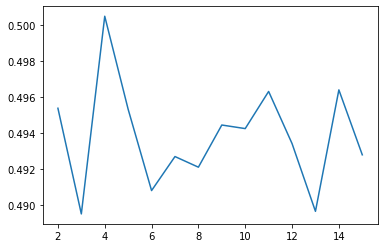

In [269]:
models_best = pd.DataFrame(columns=["Splits", "Accuracy"])

for s in range(2,splits):
    predictions = cross_val_predict(model, independentVariables, dependentVariable, cv=s)
    accuracy = metrics.r2_score(dependentVariable, predictions)
    print("Splits:", s, " Accuracy:", accuracy)
    models_best.loc[s-2] = [s, accuracy]

models_best.head()
plt.plot(models_best["Splits"] ,models_best["Accuracy"])


## Leave ONE out

 Accuracy: 0.49379239240150874


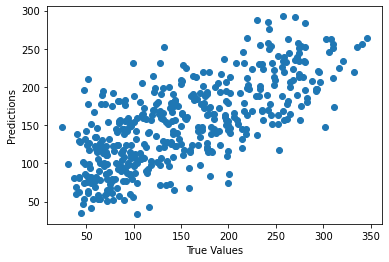

In [271]:
loo = LeaveOneOut()

predictions = cross_val_predict(model, independentVariables, dependentVariable, cv=loo)
plt.scatter(dependentVariable, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

accuracy = metrics.r2_score(dependentVariable, predictions)
print(" Accuracy:", accuracy)


Text(-50, 0.0025, 'Acuracy: 0.494')

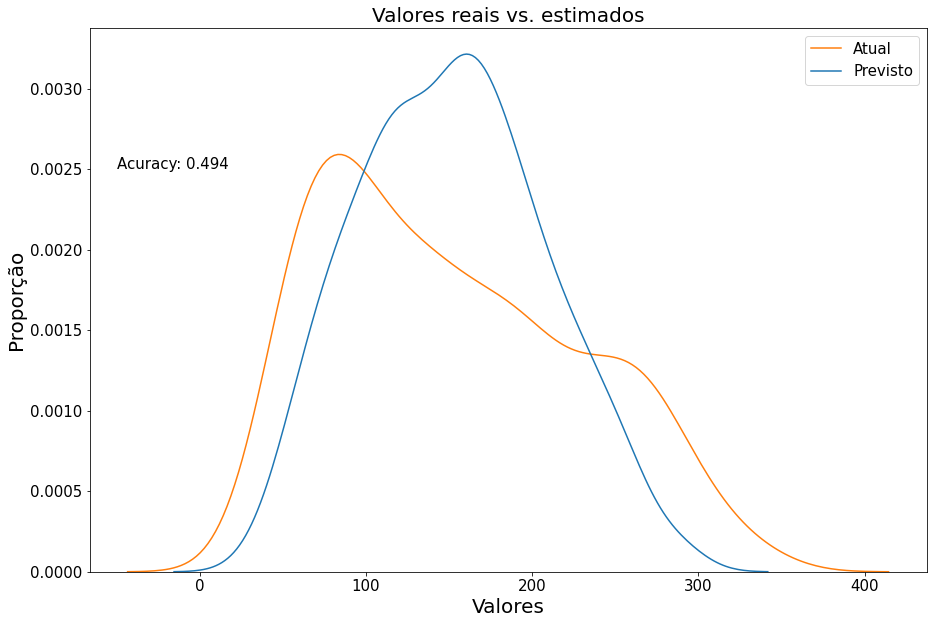

In [272]:
indexe_loo_split = np.arange(start=0,stop=predictions.shape[0])
df_loo_split = pd.DataFrame(predictions,index=indexe_loo_split)
df_loo_split.columns = ['Predicted']
df_loo_split['True'] = dependentVariable['Y']

# Criando a área do gráfico
plt.figure(figsize=(15, 10))

# Criando um gráfico de densidade
sns.kdeplot(data = df_loo_split[['Predicted','True']]) 

# Adicionando títulos
plt.title('Valores reais vs. estimados', size = 20)

# Adicionando o nome do eixo x
plt.xlabel('Valores', size = 20)

# Adicionando o nome do eixo y
plt.ylabel('Proporção', size = 20)
# Configurando tamanho do eixo y
plt.yticks(size = 15)

# Configurando tamanho do eixo x
plt.xticks(size = 15) 

# Adicionando legendas
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

# Criando um objeto para guardadr o Score(R2)
tt = "Acuracy: %.3f" % accuracy

# Passando o objeto de texto na posição desejada
plt.text(-50, 0.0025, tt, size = 15)

## References

[1] https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

[2] https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

[3] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

[4] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?highlight=cross_val_predict

[5] https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

[6] https://jakevdp.github.io/PythonDataScienceHandbook/index.html


## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

<a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 2020-10-27       | 1.0     | Eduardo Pecora    | Inicial               |
| 17-04-2023       | 1.1     | Hesau Hugo        | Reestruturação        |